In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import time


In [2]:
# matplotlib params

plt.rcParams.update({'font.size': 22})

In [3]:
# 1. Загрузите файл HR.csv в pandas dataframe

hr_df = pd.read_csv('HR.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Признаки:

1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты

In [4]:
hr_df.info()
#пропусков в данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


Среди данных есть булевые, которые могут быть неверно интерпретированны как дискретные значения.
Приведем их к соответсвующему типу, для удобства дальнейших вычислений.

In [5]:
changed_cols = hr_df[['Work_accident', 'left', 'promotion_last_5years']].astype(bool)
hr_df[['Work_accident', 'left', 'promotion_last_5years']]=changed_cols

In [6]:
# 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [7]:
# column_names = hr_df.columns.to_list()
# _modes = []
#
# for col in column_names:
#     _modes.append(st.mode(hr_df[col])[0][0])
#
# column_modes = dict(zip(column_names, _modes))
#
# for k,v in column_modes.items():
#     print(
#         f'{k} mode value is {v}'
#     )

In [1]:
def describe_data(feature_name, df_name):

    _feature_name = feature_name
    _feature = df_name[_feature_name]

    #basic statistics of described feature for
    if isinstance(_feature[0], (np.int64, float)):
        _feature_mean = np.mean(_feature)
        _feature_median = np.median(_feature)
        _feature_mode = st.mode(_feature)[0][0]
        _feature_std = np.std(_feature)
        _feature_min = np.min(_feature)
        _feature_max = np.max(_feature)

        #create plot figure and axes
        fig, (axes1, axes2) = plt.subplots(2, 1, figsize=(20, 20))

        # axes1, box plot with whiskers
        sns.boxplot(x=_feature,  ax=axes1, palette='mako')

        # axes2, histogram plot with gaussian kernel density estimate and mean, median and mode lines
        sns.histplot(data=_feature, ax=axes2, bins=100, kde=True, label=f'{_feature_name} values distribution')

        plt.axvline( x=_feature_mean, color='r', linestyle='dashed', linewidth=1, label=f'{_feature_name} mean')    #мат.ожидание
        plt.axvline( x=_feature_median, color='y', linestyle='dashed', linewidth=1, label=f'{_feature_name} median')    #медиана
        plt.axvline( x=_feature_mode, color='k', linestyle='dashed', linewidth=5, label=f'{_feature_name} mode')    #мода
        plt.legend()

        fig.subplots_adjust(bottom=0.3)

        plt.show()

        print(
            f'{_feature_name} range is {_feature_max} - {_feature_min} = {_feature_max-_feature_min}\n',
            f'{_feature_name} mode: {_feature_mode}, mean: {round(_feature_mean, 3)}, median: {_feature_median}, st.deviation: {round(_feature_std, 3)}',
        )

        # return _feature_name, _feature_max, _feature_min, _feature_mode, _feature_mean, _feature_median, _feature_std

    else:
        _unique_values = pd.DataFrame(_feature.value_counts())
        _unique_values.columns = ['amount']
        _unique_values['%'] = round(_unique_values['amount']/(sum(_unique_values['amount'])/100), 3)

        plt.figure(figsize=(16, 10))
        sns.histplot(data=_feature, kde=True, label=f'{_feature_name} values distribution')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.show()

        print(
            f'{_feature_name} values:\n',
            _unique_values
        )


        # return _unique_values

In [9]:
# def print_description(_unique_values):
    # _feature_name = kwargs.get('_feature_name', None)
    # _feature_max = kwargs.get('_feature_max', None)
    # _feature_min = kwargs.get('_feature_min', None)
    # _feature_mode = kwargs.get('_feature_mode', None)
    # _feature_mean = kwargs.get('_feature_mean', None)
    # _feature_median = kwargs.get('_feature_median', None)
    # _feature_std = kwargs.get('_feature_std', None)
    # _unique_values = kwargs.get('_unique_values', None)
    # print(
    #         _unique_values
    #     )
    # else:
    #     print(
    #         f'{_feature_name} range is {_feature_max} - {_feature_min} = {_feature_max-_feature_min}',
    #         f'{_feature_name} mode: {_feature_mode}, mean: {round(_feature_mean, 3)}, median: {_feature_median}, st.deviation: {round(_feature_std, 3)}',
    #     )


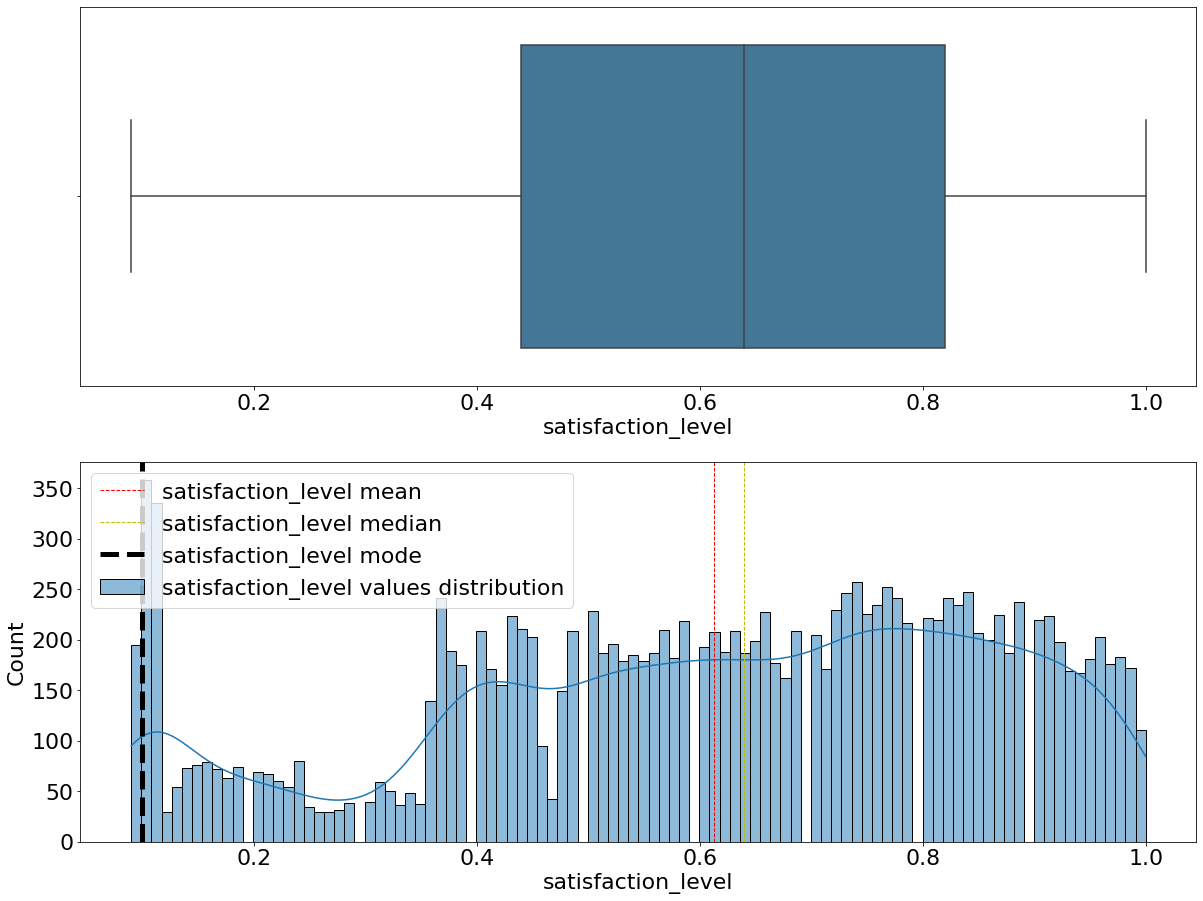

satisfaction_level range is 1.0 - 0.09 = 0.91
 satisfaction_level mode: 0.1, mean: 0.613, median: 0.64, st.deviation: 0.249
last_evaluation range is 1.0 - 0.36 = 0.64
 last_evaluation mode: 0.55, mean: 0.716, median: 0.72, st.deviation: 0.171
number_project range is 7 - 2 = 5
 number_project mode: 4, mean: 3.803, median: 4.0, st.deviation: 1.233
average_montly_hours range is 310 - 96 = 214
 average_montly_hours mode: 135, mean: 201.05, median: 200.0, st.deviation: 49.941
time_spend_company range is 10 - 2 = 8
 time_spend_company mode: 3, mean: 3.498, median: 3.0, st.deviation: 1.46
Work_accident values:
        amount       %
False   12830  85.539
True     2169  14.461
left values:
        amount       %
False   11428  76.192
True     3571  23.808
promotion_last_5years values:
        amount       %
False   14680  97.873
True      319   2.127
department values:
              amount       %
sales          4140  27.602
technical      2720  18.135
support        2229  14.861
IT           

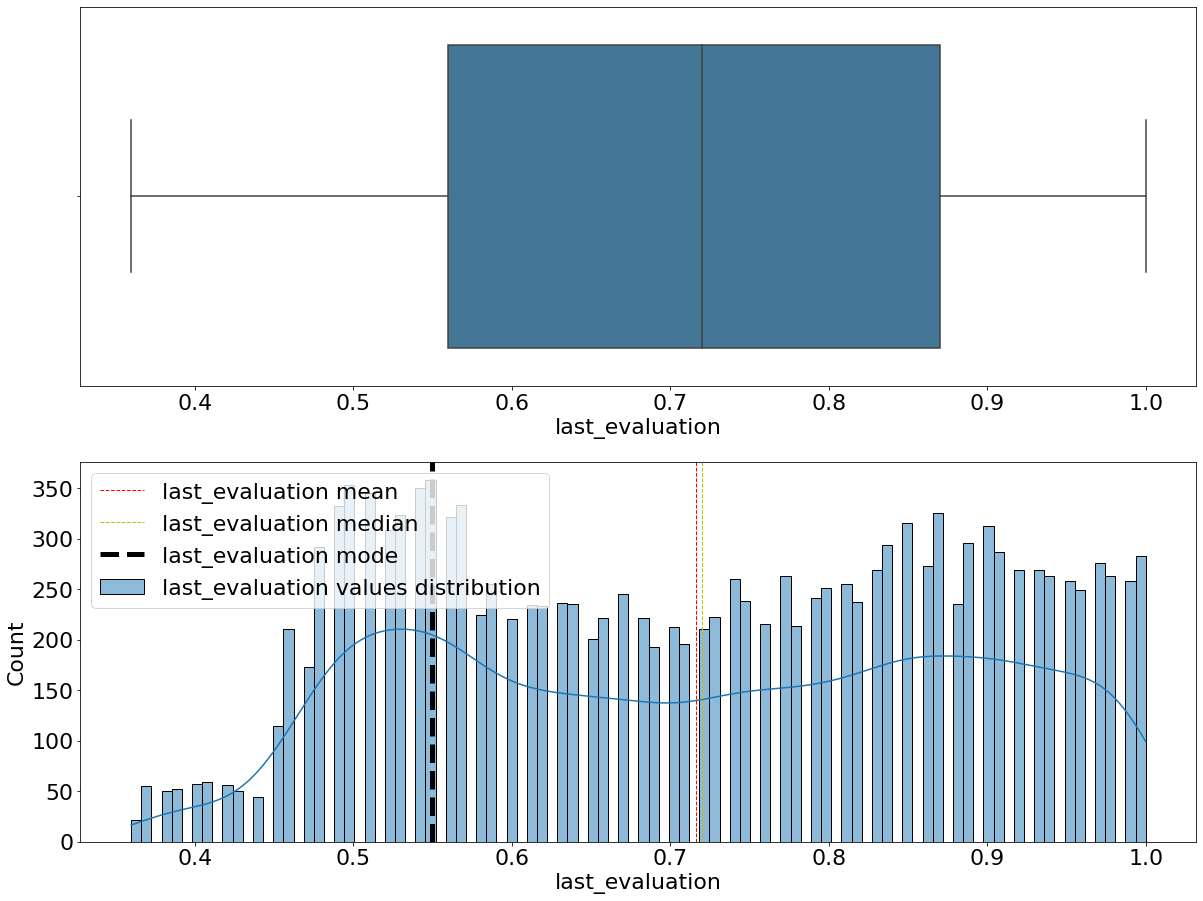

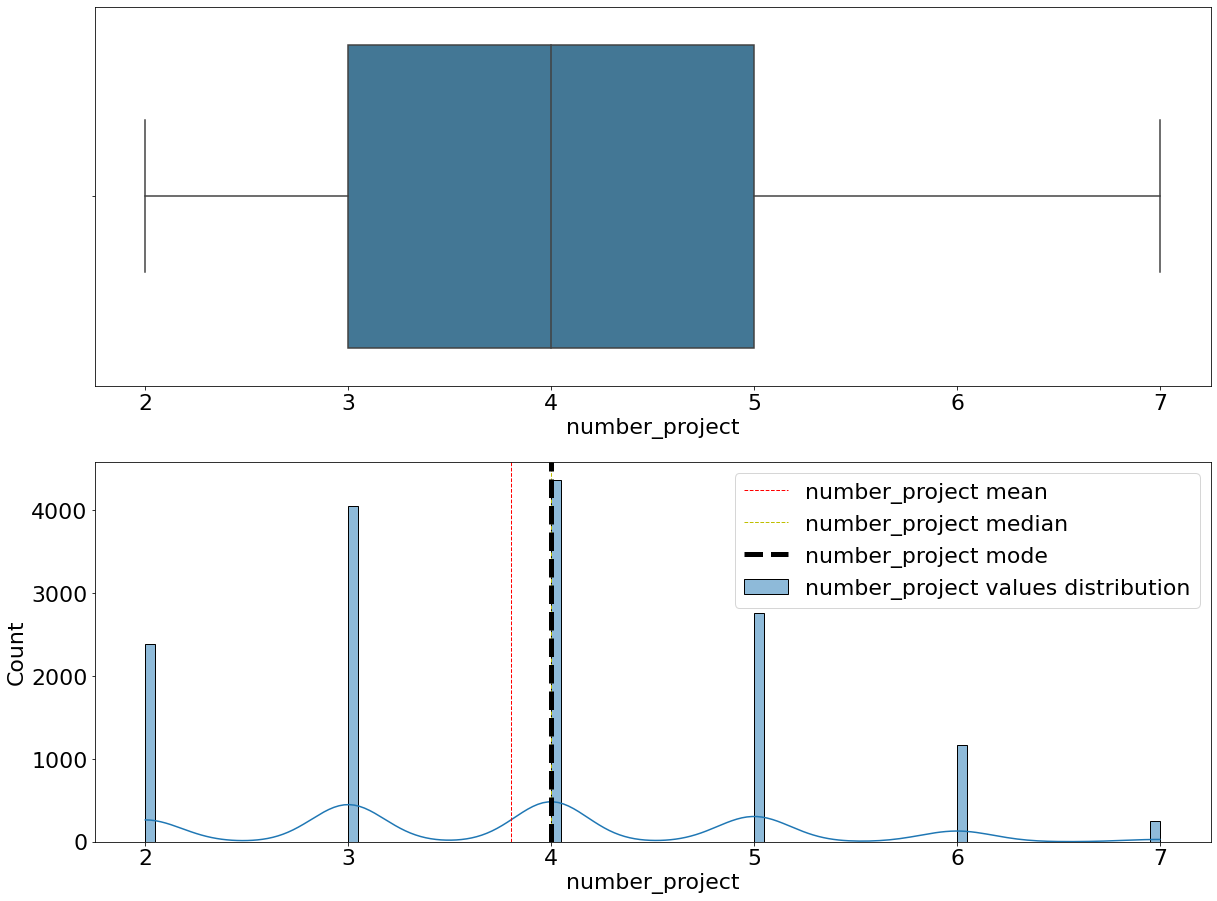

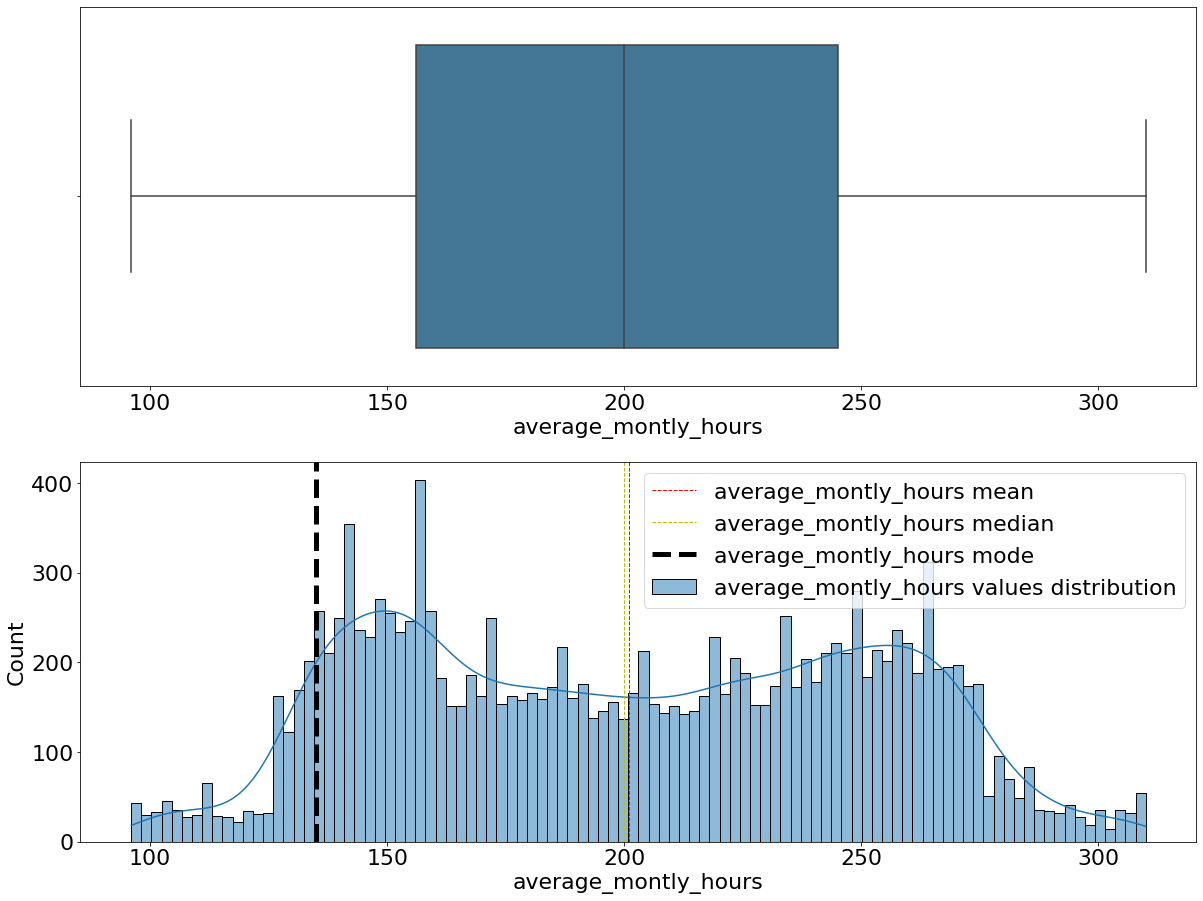

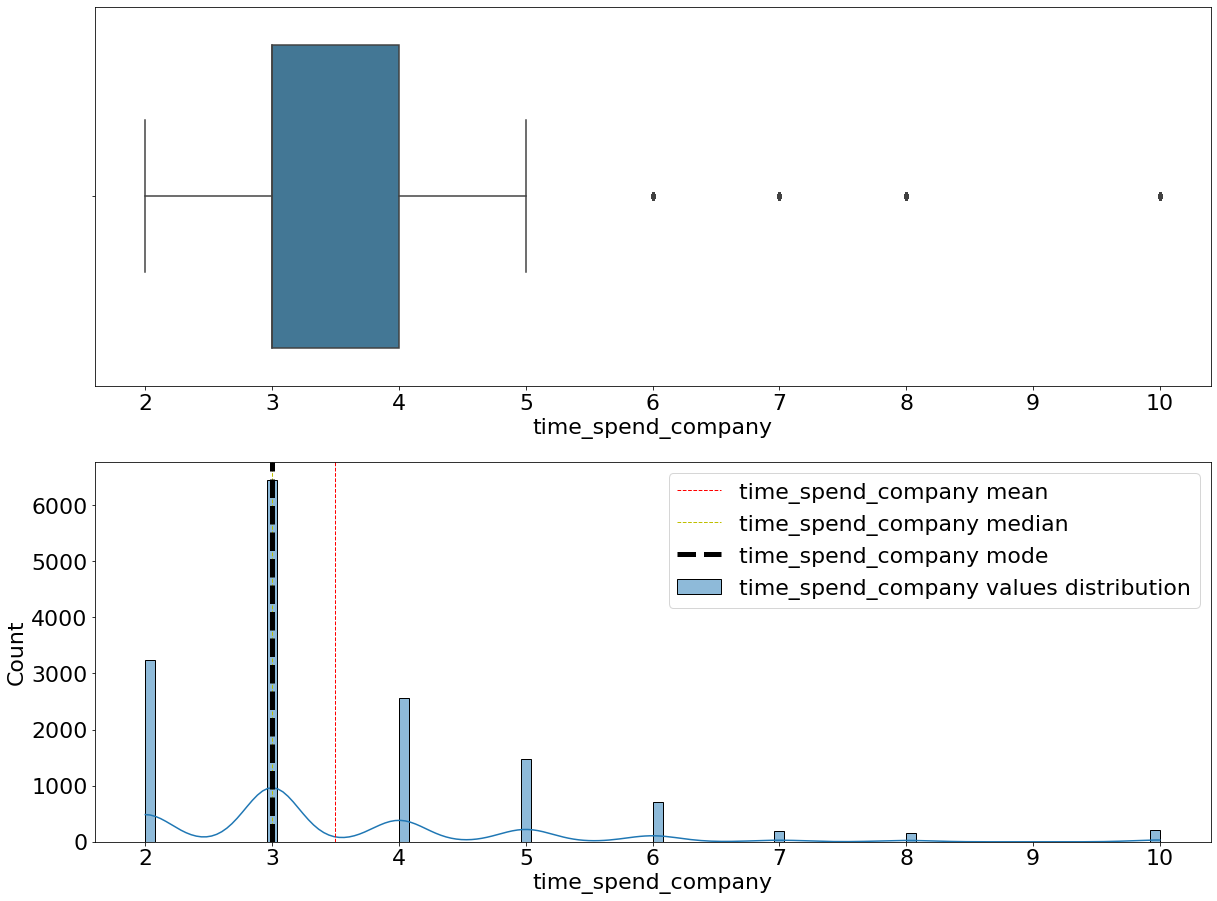

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


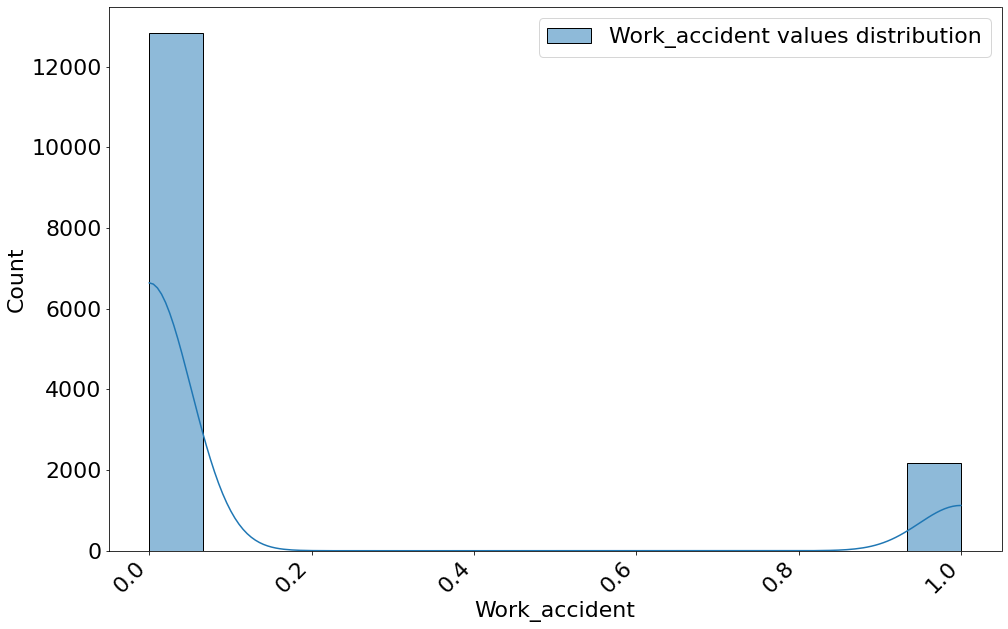

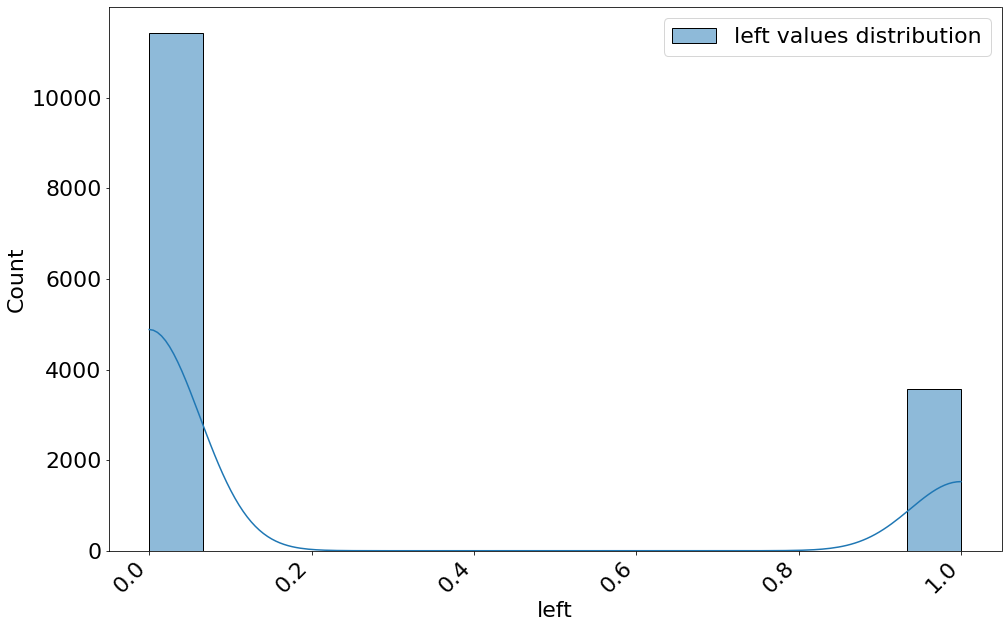

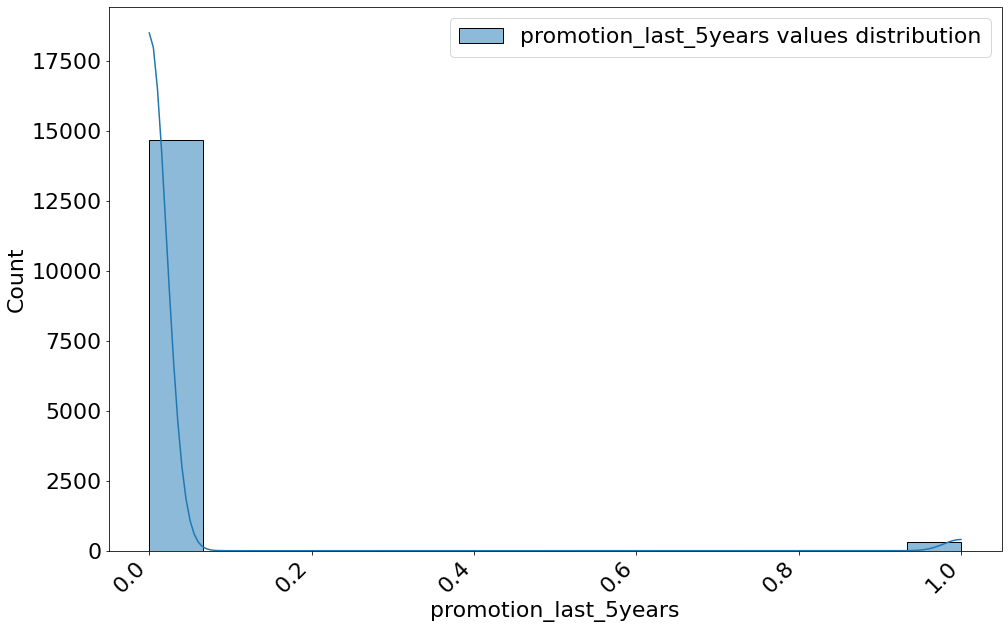

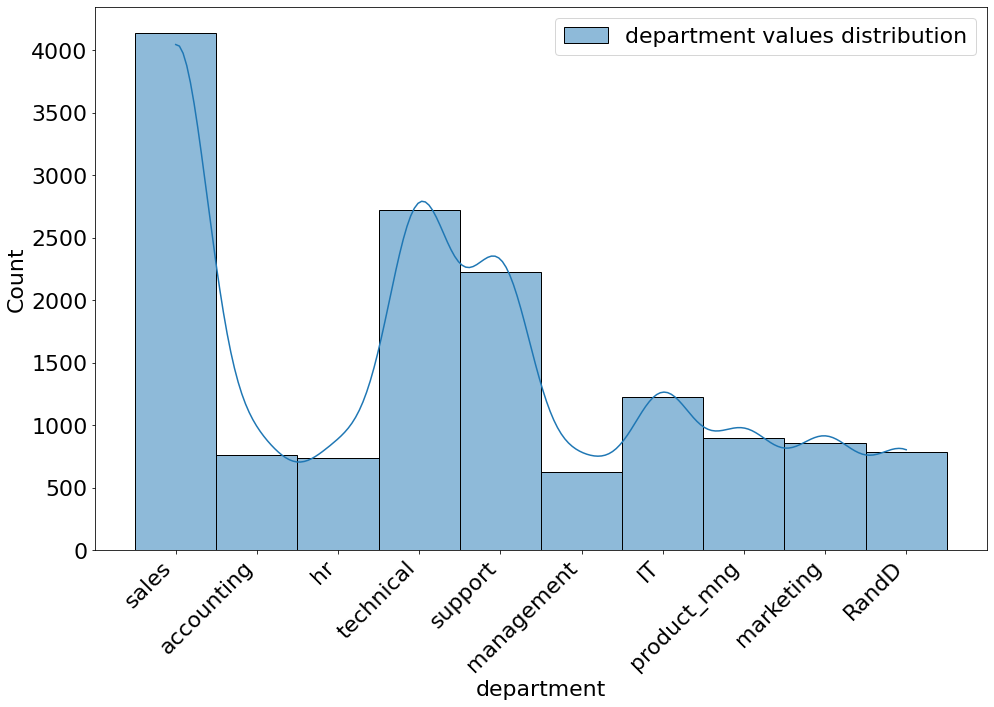

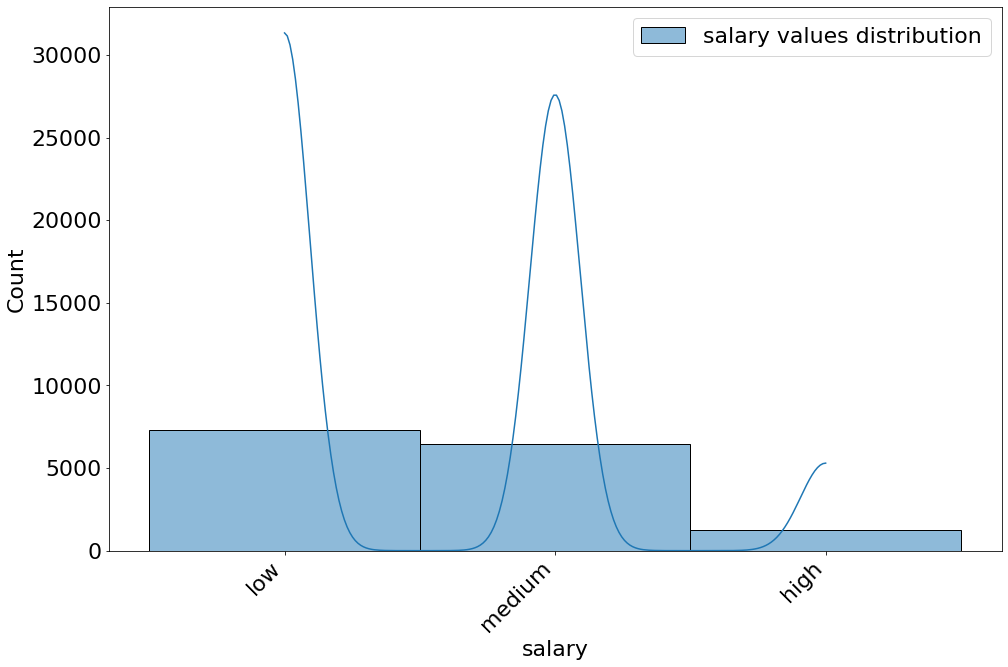

In [19]:
column_names = hr_df.columns.to_list()
for col in column_names:
    describe_data(feature_name=col, df_name=hr_df)


# describe_data(feature_name='salary', df_name=hr_df)
# print_description(describe_data(feature_name='department', df_name=hr_df))

Линии на графиках наглядно показывают, что визуально не всегда можно определить визуально средние значени.
Особенно это касается моды.

In [11]:
# tmp = pd.DataFrame(hr_df['salary'].value_counts())
# tmp.columns = ['amount']
# tmp
# for i in range(len(tmp)):
#     print(tmp.index[i], tmp.values[i]/len(hr_df['salary']))

In [12]:
# tmp = pd.DataFrame(hr_df['salary'].value_counts())
# tmp.columns = ['amount']
# tmp
# for i in range(len(tmp)):
#     print(tmp.index[i], tmp.values[i]/len(hr_df['salary']))

In [152]:
# tmp = pd.DataFrame(hr_df['salary'].value_counts())
# tmp.columns = ['amount']
# tmp
# for i in range(len(tmp)):
#     print(tmp.index[i], tmp.values[i]/len(hr_df['salary']))

,amount
low,7316
medium,6446
high,1237
